In [4]:
# Goal: Estimate what kind of prior range would be reasonable
import sys, collections, shelve, json, random, multiprocessing
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numba
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
import astropy.table as table
import dynesty
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import seaborn
import tqdm
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.analysis.piro2020 as piro2020

In [3]:
# some global assumptions
opacity = 0.07 # cm^2/g
v_sc = 10912 * u.km.to(u.cm) # cm/s

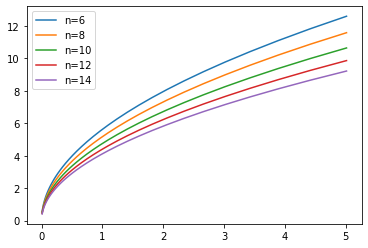

In [13]:
S_TO_D = u.s.to(u.d)
for n in [6,8,10,12,14]:
    m_e = np.logspace(-2, 0.7) * u.Msun.to(u.g)
    t_diff = piro2020.diffusion_timescale(opacity, m_e, 1.1, n, v_sc)
    plt.plot(m_e*u.g.to(u.Msun), t_diff*S_TO_D, label=f"n={n}")
plt.legend()

In [6]:
# I would say range of 0.5 to 10 is reasonable for t_diff

array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
       0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
       0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
       0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
       0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
       0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
       0.40949151, 0.42919343, 0.44984327, 0.47148664, 0.49417134,
       0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
       0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
       0.82864277, 0.86851137, 0.91029818, 0.95409548, 1.        ])

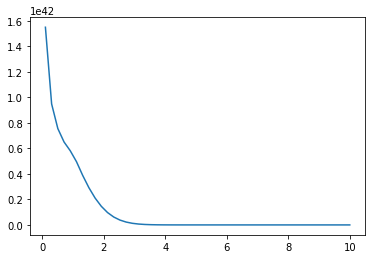

In [18]:
# Unrelated check if the lum things are reasonable
R_e = 9 * u.Rsun.to(u.cm)
t_diff = 1 * u.d.to(u.s)
n = 11
t_grid = np.linspace(0.1, 10)
plt.plot(t_grid, np.vectorize(piro2020.lum)(t_grid*u.d.to(u.s), t_diff, n, R_e, v_sc, opacity))